In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_pairs
from sklearn.metrics import classification_report
from deepface import DeepFace
from time import time

In [2]:
lfw_faces = fetch_lfw_pairs(subset='test',resize=1,color=True,data_home="./Faces")

In [3]:
samples = np.random.choice(lfw_faces.shape[0],size=100,replace=False)
pairs = lfw_faces["pairs"][samples]
target = lfw_faces["target"][samples]

In [4]:
pairs.shape

(100, 2, 125, 94, 3)

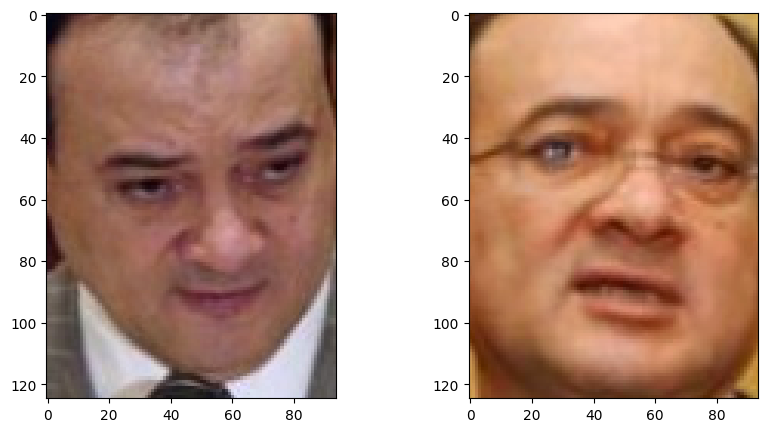

1


In [5]:
fig,axes = plt.subplots(1,2,figsize=(10,5))
axes[0].imshow(pairs[0][0]/255)
axes[1].imshow(pairs[0][1]/255)
plt.show()
print(target[0])

In [6]:
models = [
  "VGG-Face", 
  "Facenet", 
  "Facenet512", 
  "OpenFace", 
  "DeepFace", 
  "DeepID", 
  "ArcFace", 
  "Dlib", 
  "SFace",
]


predicted = []
for model in models:
    print(f"Current Model: {model}")
    predicted.append([])
    for img1, img2 in pairs:

        predicted[-1].append(
            DeepFace.verify(img1_path=img1,img2_path=img2,model_name=model,enforce_detection=False)["verified"]+0)
        
    print(f"{model} ended")

Current Model: VGG-Face
1/1 [==============================] - 0s 210ms/step


1/1 [==============================] - 0s 209ms/step
VGG-Face ended
Current Model: Facenet
1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 29ms/step
Facenet ended
Current Model: Facenet512
1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 28ms/step
Facenet512 ended
Current Model: OpenFace
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step
OpenFace ended
Current Model: DeepFace
1/1 [==============================] - 0s 37ms/step


1/1 [==============================] - 0s 37ms/step
DeepFace ended
Current Model: DeepID
1/1 [==============================] - 0s 11ms/step


1/1 [==============================] - 0s 11ms/step
DeepID ended
Current Model: ArcFace
1/1 [==============================] - 0s 53ms/step


1/1 [==============================] - 0s 51ms/step
ArcFace ended
Current Model: Dlib
Dlib ended
Current Model: SFace
SFace ended


In [25]:
class RecognitionModelsTesting:
    
    def __init__(self,images_pair,target,models):
        self.images_pair = images_pair
        self.target = target
        self.models = models
        
    def start_prediction(self):
        self.predicted = {}
        self.avg_time = {}
        
        avg_time = self.avg_time
        predicted = self.predicted
        
        models = self.models
        images_pair = self.images_pair
       
        for model in models:
            total_time = 0
            predicted[model] = []
            print(f"Current Model: {model}")
            for img1,img2 in images_pair:
                start_time = time()
                
                predicted[model].append(
                    DeepFace.verify(
                        img1_path=img1,
                        img2_path=img2,
                        model_name=model,
                        enforce_detection=False
                    )["verified"]+0
                )
                
                total_time += time()-start_time
                
            print(f"End of Model: {model}\nTotal Time Spent: {total_time}\n")
            avg_time[model] = total_time/len(images_pair)
            
        
    def prediction_result(self):
        models = self.models
        target = self.target
        predicted = self.predicted
        avg_time = self.avg_time 
        
        for model in models:
            
            print(f"Model: {model}")
            print(f"Average time spent: {avg_time[model]}")
            print(f"Classification report:\n{classification_report(predicted[model],target)}")


In [26]:
models = [
  "VGG-Face", 
  "Facenet", 
  "Facenet512", 
  "OpenFace", 
  "DeepFace", 
  "DeepID", 
  "ArcFace", 
  "Dlib", 
  "SFace",
]

rt = RecognitionModelsTesting(pairs,target,models)
rt.start_prediction()
rt.prediction_result()

Current Model: VGG-Face
1/1 [==============================] - 0s 205ms/step


1/1 [==============================] - 0s 211ms/step
End of Model: VGG-Face
Total Time Spent: 45.61997389793396

Current Model: Facenet
1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 28ms/step
End of Model: Facenet
Total Time Spent: 9.819064140319824

Current Model: Facenet512
1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 29ms/step
End of Model: Facenet512
Total Time Spent: 9.825906753540039

Current Model: OpenFace
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step
End of Model: OpenFace
Total Time Spent: 6.865857839584351

Current Model: DeepFace
1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 34ms/step
End of Model: DeepFace
Total Time Spent: 10.641332864761353

Current Model: DeepID
1/1 [==============================] - 0s 11ms/step


1/1 [==============================] - 0s 11ms/step
End of Model: DeepID
Total Time Spent: 5.641775608062744

Current Model: ArcFace
1/1 [==============================] - 0s 51ms/step


1/1 [==============================] - 0s 51ms/step
End of Model: ArcFace
Total Time Spent: 14.13593602180481

Current Model: Dlib
End of Model: Dlib
Total Time Spent: 1.659986972808838

Current Model: SFace
End of Model: SFace
Total Time Spent: 1.1220703125

Model: VGG-Face
Average time spent: 0.4561997389793396
Classification report:
              precision    recall  f1-score   support

           0       0.74      0.97      0.84        38
           1       0.98      0.79      0.87        62

    accuracy                           0.86       100
   macro avg       0.86      0.88      0.86       100
weighted avg       0.89      0.86      0.86       100

Model: Facenet
Average time spent: 0.09819064140319825
Classification report:
              precision    recall  f1-score   support

           0       1.00      0.81      0.89        62
           1       0.76      1.00      0.86        38

    accuracy                           0.88       100
   macro avg       0.88      0.90      

# Testing potential Models with whole test set
### Models: Facenet, Facenet 512 and ARCFace

In [28]:
models = [
    "Facenet",
    "Facenet512",
    "ArcFace"
]

rt = RecognitionModelsTesting(lfw_faces["pairs"],lfw_faces["target"],models)
rt.start_prediction()
rt.prediction_result()

Current Model: Facenet
1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 29ms/step
End of Model: Facenet
Total Time Spent: 100.30204963684082

Current Model: Facenet512
1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 28ms/step
End of Model: Facenet512
Total Time Spent: 101.0327000617981

Current Model: ArcFace
1/1 [==============================] - 0s 50ms/step


1/1 [==============================] - 0s 51ms/step


1/1 [==============================] - 0s 51ms/step


1/1 [==============================] - 0s 56ms/step


1/1 [==============================] - 0s 54ms/step


1/1 [==============================] - 0s 53ms/step


1/1 [==============================] - 0s 52ms/step


1/1 [==============================] - 0s 52ms/step


1/1 [==============================] - 0s 53ms/step


1/1 [==============================] - 0s 51ms/step


1/1 [==============================] - 0s 52ms/step


1/1 [==============================] - 0s 51ms/step


1/1 [==============================] - 0s 53ms/step


1/1 [==============================] - 0s 51ms/step
End of Model: ArcFace
Total Time Spent: 144.80042243003845

Model: Facenet
Average time spent: 0.10030204963684082
Classification report:
              precision    recall  f1-score   support

           0       1.00      0.84      0.91       597
           1       0.81      1.00      0.89       403

    accuracy                           0.90      1000
   macro avg       0.90      0.92      0.90      1000
weighted avg       0.92      0.90      0.90      1000

Model: Facenet512
Average time spent: 0.1010327000617981
Classification report:
              precision    recall  f1-score   support

           0       1.00      0.75      0.86       667
           1       0.67      1.00      0.80       333

    accuracy                           0.83      1000
   macro avg       0.83      0.87      0.83      1000
weighted avg       0.89      0.83      0.84      1000

Model: ArcFace
Average time spent: 0.14480042243003846
Classification report